# <center>IGR204 Data Visualization</center>

## Data Cleaning

In [2]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from math import pi
 
# Définition de paramètres 
pd.options.display.max_columns = 200
pd.options.display.max_rows = 700
sns.set()

In [2]:
data = pd.read_csv('data/SpeedDating.csv', encoding = 'latin-1', engine='python', sep=',')

In [3]:
data_women = data[data['gender'] == 0].copy()
data_men = data[data['gender'] == 1].copy()

In [4]:
print(data.shape)
print(data_women.shape)
print(data_men.shape)

(8378, 195)
(4184, 195)
(4194, 195)


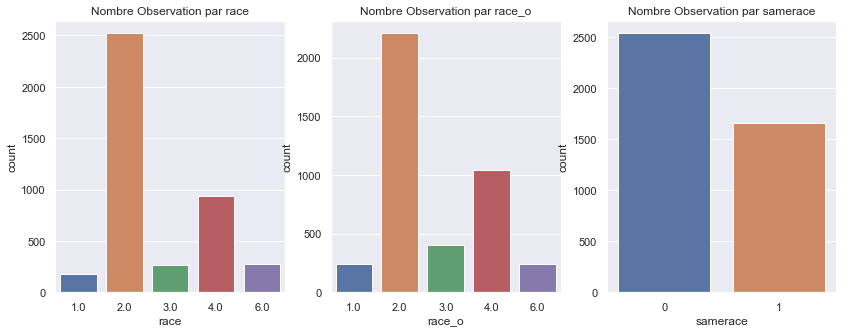

In [5]:
plt.figure(1, figsize=(14,5))
plt.subplot(131)
sns.countplot(data_men['race'])
plt.title('Nombre Observation par race')
plt.subplot(132)
sns.countplot(data_men['race_o'])
plt.title('Nombre Observation par race_o')
plt.subplot(133)
sns.countplot(data_men['samerace'])
plt.title('Nombre Observation par samerace')
plt.show()

## Création d'un dataframe avec une ligne par match

In [1]:
# Import data
df = pd.read_csv("data/SpeedDating.csv", encoding="Latin-1")
df_match = df[df.match == 1].copy()
df_match.dropna(subset=["race", "goal", "field_cd","from", "career_c", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"], inplace=True)
df_match.reset_index(drop=True, inplace=True)
list_key_date = [str(int(df_match.loc[x, 'iid'])) + "_" + str(int(df_match.loc[x, "pid"])) + "_" + str(df_match.loc[x, "wave"]) if int(df_match.loc[x, "iid"])>int(df_match.loc[x, "pid"]) else str(int(df_match.loc[x, 'pid']))  + "_" + str(int(df_match.loc[x, "iid"])) + "_" + str(df_match.loc[x, "wave"]) for x in range(df_match.shape[0])]
df_match["key_date"] = list_key_date
# Split men/women to take attributes from the two tables
df_men = df_match[df_match.gender==1].loc[:, ["key_date", "race", "goal", "field_cd", "from", "career_c", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]].copy()
df_women = df_match[df_match.gender==0].loc[:, ["key_date", "race", "goal", "field_cd", "from", "career_c", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]].copy()
df_res = df_men.merge(df_women, how="inner", on="key_date", suffixes=('_H', '_F'))

NameError: name 'pd' is not defined

In [49]:
df_res.shape

(370, 41)

In [50]:
# Normalisation des données
list_divide_100 = ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H"]
list_divide_10 = ["attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]
for i in range(df_res.shape[0]):
#     wave = int(df_res.iloc[i]['key_date'].split('_')[-1])
    df_res.loc[i, list_divide_100] = df_res.loc[i, list_divide_100].copy()/100
    df_res.loc[i, list_divide_10] = df_res.loc[i, list_divide_10].copy()/10

In [69]:
df_res[(df_res['race_H'] == 1) &(df_res['race_F'] == 2)]

,key_date,race_H,goal_H,field_cd_H,from_H,career_c_H,attr1_1_H,sinc1_1_H,intel1_1_H,fun1_1_H,amb1_1_H,attr5_1_H,sinc5_1_H,intel5_1_H,fun5_1_H,amb5_1_H,attr3_1_H,sinc3_1_H,intel3_1_H,fun3_1_H,amb3_1_H,race_F,goal_F,field_cd_F,from_F,career_c_F,attr1_1_F,sinc1_1_F,intel1_1_F,fun1_1_F,amb1_1_F,attr5_1_F,sinc5_1_F,intel5_1_F,fun5_1_F,amb5_1_F,attr3_1_F,sinc3_1_F,intel3_1_F,fun3_1_F,amb3_1_F
49,282_264_11,1.0,1.0,5.0,UNCC,7.0,0.25,0.15,0.2,0.20,0.10,0.7,1.0,0.9,0.9,1.0,0.7,0.9,0.7,0.9,1.0,2.0,1.0,6.0,"Washington, D.C.",2.0,0.15,0.15,0.25,0.20,0.05,0.8,0.7,0.9,0.8,0.6,0.8,0.7,0.9,0.8,0.5
51,282_271_11,1.0,1.0,5.0,UNCC,7.0,0.25,0.15,0.2,0.20,0.10,0.7,1.0,0.9,0.9,1.0,0.7,0.9,0.7,0.9,1.0,2.0,2.0,11.0,New York,11.0,0.10,0.15,0.40,0.15,0.10,0.9,1.0,0.9,1.0,1.0,0.9,1.0,0.9,1.0,1.0
75,292_266_11,1.0,1.0,13.0,New York City,7.0,0.20,0.18,0.2,0.17,0.10,1.0,0.7,1.0,0.6,0.9,0.8,1.0,1.0,0.8,1.0,2.0,2.0,16.0,new york city,10.0,0.25,0.20,0.20,0.25,0.00,0.7,0.7,0.7,0.7,0.5,0.8,0.8,0.7,0.7,0.4
264,485_476_19,1.0,2.0,3.0,"South Orange, New Jersey",2.0,0.20,0.15,0.2,0.15,0.15,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.7,0.7,2.0,5.0,13.0,California,9.0,0.20,0.20,0.20,0.15,0.15,0.7,0.5,0.7,0.7,0.8,0.7,0.9,0.7,0.5,0.6
363,551_521_21,1.0,1.0,8.0,London & New York,7.0,0.40,0.20,0.2,0.20,0.00,0.7,0.9,0.9,0.2,0.4,0.7,0.8,0.8,0.3,0.5,2.0,1.0,11.0,Salt Lake City,9.0,0.10,0.30,0.20,0.15,0.15,0.7,0.9,0.9,0.9,0.9,0.7,0.9,0.8,0.9,0.8


In [71]:
df_res.groupby(["race_H", "race_F"]).mean()

goal_H  field_cd_H  career_c_H  attr1_1_H  sinc1_1_H  \
race_H race_F                                                           
1.0    1.0     1.000000    9.000000    7.000000   0.225000   0.165000   
       2.0     1.200000    6.800000    6.000000   0.260000   0.166000   
       3.0     1.000000   13.000000    7.000000   0.200000   0.180000   
       4.0     1.200000    5.200000    6.000000   0.270000   0.160000   
       6.0     1.000000    9.000000    7.000000   0.225000   0.165000   
2.0    1.0     2.000000    4.875000    4.000000   0.240000   0.152500   
       2.0     2.124031    7.193798    5.651163   0.314389   0.133926   
       3.0     1.666667    8.333333    4.952381   0.292381   0.154286   
       4.0     1.838710    7.951613    5.209677   0.297718   0.134295   
       6.0     2.454545    6.818182    3.818182   0.293636   0.160909   
3.0    1.0     3.000000    6.500000    3.000000   0.250000   0.150000   
       2.0     2.000000    9.117647    7.470588   0.313529   0.137059   
       3.0     2.750000    5.500000    4.500000   0.270000   0.157500   
       4.0     2.333333    8.000000    6.500000   0.350000   0.116667   
       6.0     2.333333    8.000000    7.000000   0.266667   0.233333   
4.0    1.0     2.333333    6.000000    5.333333   0.200000   0.233333   
       2.0     1.500000    7.272727    5.863636   0.246818   0.200455   
       3.0     1.250000    7.750000    6.250000   0.225000   0.212500   
       4.0     2.000000    7.040000    6.200000   0.268400   0.180000   
       6.0     2.000000    5.000000    7.000000   0.375000   0.150000   
6.0    1.0     1.333333    5.333333    3.333333   0.316667   0.073333   
       2.0     1.916667    9.416667    4.250000   0.258333   0.122500   
       3.0     2.714286    7.285714    5.000000   0.234286   0.148571   
       4.0     2.692308    7.769231    5.000000   0.242308   0.196154   
       6.0     2.000000   10.000000    2.000000   0.300000   0.000000   

               intel1_1_H  fun1_1_H  amb1_1_H  attr5_1_H  sinc5_1_H  \
race_H race_F                                                         
1.0    1.0       0.200000  0.185000  0.100000   0.850000   0.850000   
       2.0       0.200000  0.184000  0.090000   0.760000   0.880000   
       3.0       0.200000  0.170000  0.100000   1.000000   0.700000   
       4.0       0.200000  0.190000  0.090000   0.700000   0.940000   
       6.0       0.200000  0.185000  0.100000   0.850000   0.850000   
2.0    1.0       0.221250  0.202500  0.088750   0.687500   0.737500   
       2.0       0.190849  0.191815  0.064841   0.690698   0.725581   
       3.0       0.191905  0.195238  0.080952   0.642857   0.752381   
       4.0       0.208953  0.188731  0.071542   0.685484   0.750000   
       6.0       0.191818  0.252727  0.050909   0.690909   0.754545   
3.0    1.0       0.200000  0.175000  0.100000   0.750000   0.900000   
       2.0       0.209412  0.166471  0.088824   0.723529   0.782353   
       3.0       0.215000  0.182500  0.100000   0.725000   0.825000   
       4.0       0.200000  0.175000  0.076667   0.766667   0.733333   
       6.0       0.250000  0.150000  0.100000   0.733333   0.800000   
4.0    1.0       0.166667  0.200000  0.133333   0.533333   0.800000   
       2.0       0.178636  0.162727  0.098182   0.600000   0.786364   
       3.0       0.137500  0.187500  0.092500   0.625000   0.750000   
       4.0       0.159200  0.174800  0.084400   0.632000   0.872000   
       6.0       0.150000  0.150000  0.075000   0.700000   0.800000   
6.0    1.0       0.186667  0.300000  0.103333   0.800000   0.933333   
       2.0       0.225833  0.216667  0.094167   0.758333   0.833333   
       3.0       0.248571  0.205714  0.122857   0.828571   0.914286   
       4.0       0.253846  0.165385  0.075385   0.784615   0.853846   
       6.0       0.300000  0.300000  0.100000   1.000000   1.000000   

               intel5_1_H  fun5_1_H  amb5_1_H  attr3_1_H  sinc3_1_H  \
race_H race_F                                           

In [52]:
# Cas 1: un homme d'une ethnie 1(gauche) -> une femme d'une ethnie 2(droite)
# On souhaite ce que : 
# START
# ce que la femme attend     -> "attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F"
# comment l'homme est perçue -> "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H"    
# comment l'homme se voit    -> "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H"
# TARGET
# ce que la femme attend     -> "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H"
# comment l'homme est perçue -> "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F"    
# comment l'homme se voit    -> "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"
#"attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F"  
dict_match_race = {}
for race_start in df_res['race_H'].unique():
    for race_target in df_res['race_F'].unique():
        data_json = df_res[(df_res['race_H'] == race_start) &(df_res['race_F'] == race_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_race[str(race_start)+'_'+str(race_target)] = data_json

In [53]:
dict_match_goal = {}
for goal_start in df_res['goal_H'].unique():
    for goal_target in df_res['goal_F'].unique():
        data_json = df_res[(df_res['goal_H'] == goal_start) &(df_res['goal_F'] == goal_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_goal[str(goal_start)+'_'+str(goal_target)] = data_json

In [54]:
dict_match_field = {}
for field_start in df_res['field_cd_H'].unique():
    for field_target in df_res['field_cd_F'].unique():
        data_json = df_res[(df_res['field_cd_H'] == field_start) &(df_res['field_cd_F'] == field_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_field[str(field_start)+'_'+str(field_target)] = data_json

In [55]:
dict_match_from = {}
for from_start in df_res['from_H'].unique():
    for from_target in df_res['from_F'].unique():
        data_json = df_res[(df_res['from_H'] == from_start) &(df_res['from_F'] == from_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_from[str(from_start)+'_'+str(from_target)] = data_json

In [56]:
dict_match_career = {}
for career_start in df_res['career_c_H'].unique():
    for career_target in df_res['career_c_F'].unique():
        data_json = df_res[(df_res['career_c_H'] == career_start) &(df_res['career_c_F'] == career_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_from[str(career_start)+'_'+str(career_target)] = data_json

In [13]:
def product_json(dict_match, file_name):
    
    output = {} 
    for key in dict_match.keys():
        dict_match[key] = dict_match[key].fillna(dict_match[key].mean()).copy()
        dict_match[key] = dict_match[key].mean().copy()
        
        # START
        expected = { 'Attractive': dict_match[key]["attr1_1_F"],
                    'Sincere': dict_match[key]["sinc1_1_F"],
                    'Intelligent':dict_match[key]["intel1_1_F"],
                    'Fun': dict_match[key]["fun1_1_F"],
                    'Ambitious': dict_match[key]["amb1_1_F"]
        }

        perceive = { 'Attractive':dict_match[key]["attr5_1_H"],
                    'Sincere':dict_match[key]["sinc5_1_H"],
                    'Intelligent':dict_match[key]["intel5_1_H"],
                    'Fun':dict_match[key]["fun5_1_H"],
                    'Ambitious':dict_match[key]["amb5_1_H"]
        }

        ownView = { 'Attractive':dict_match[key]["attr3_1_H"],
                    'Sincere':dict_match[key]["sinc3_1_H"],
                    'Intelligent':dict_match[key]["intel3_1_H"],
                    'Fun':dict_match[key]["fun3_1_H"],
                    'Ambitious':dict_match[key]["amb3_1_H"]
        }
        
        # TARGET
        expected_target = { 'Attractive': dict_match[key]["attr1_1_H"],
                        'Sincere': dict_match[key]["sinc1_1_H"],
                        'Intelligent':dict_match[key]["intel1_1_H"],
                        'Fun': dict_match[key]["fun1_1_H"],
                        'Ambitious': dict_match[key]["amb1_1_H"]
        }

        perceive_target = { 'Attractive':dict_match[key]["attr5_1_F"],
                        'Sincere':dict_match[key]["sinc5_1_F"],
                        'Intelligent':dict_match[key]["intel5_1_F"],
                        'Fun':dict_match[key]["fun5_1_F"],
                        'Ambitious':dict_match[key]["amb5_1_F"]
        }

        ownView_target = { 'Attractive':dict_match[key]["attr3_1_F"],
                        'Sincere':dict_match[key]["sinc3_1_F"],
                        'Intelligent':dict_match[key]["intel3_1_F"],
                        'Fun':dict_match[key]["fun3_1_F"],
                        'Ambitious':dict_match[key]["amb3_1_F"]
        }
        
        list_expected = []
        list_perceive = []
        list_ownView = []
        
        list_expected_target = []
        list_perceive_target = []
        list_ownView_target = []
        
        for i in expected.keys():
            list_expected.append({"axis": i, "value": expected[i]})
            list_perceive.append({"axis": i, "value": perceive[i]})
            list_ownView.append({"axis": i, "value": ownView[i]})
            
            list_expected_target.append({"axis": i, "value": expected_target[i]})
            list_perceive_target.append({"axis": i, "value": perceive_target[i]})
            list_ownView_target.append({"axis": i, "value": ownView_target[i]})
        
        res = {}
        res['expected'] = list_expected
        res['perceive'] = list_perceive
        res['ownView'] = list_ownView
        
        res['expected_target'] = list_expected_target
        res['perceive_target'] = list_perceive_target
        res['ownView_target'] = list_ownView_target
        
        output[key] = res

    with open(file_name, 'w', encoding='utf-8') as outfile:
        json.dump(output, outfile) #, ensure_ascii=False, indent=2

In [ ]:
product_json(dict_match_race, "data_radar_race.json")
product_json(dict_match_goal, "data_radar_goal.json")
product_json(dict_match_field, "data_radar_field.json")
product_json(dict_match_from, "data_radar_from.json")

In [57]:
#### RACE ####

# Race compare goal
dict_match_race_goal = {}
for race_start in df_res['race_H'].unique():
    for goal_target in df_res['goal_F'].unique():
        data_json = df_res[(df_res['race_H'] == race_start) &(df_res['goal_F'] == goal_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_race_goal[str(race_start)+'_'+str(goal_target)] = data_json

# Race compare field
dict_match_race_field = {}
for race_start in df_res['race_H'].unique():
    for field_target in df_res['field_cd_F'].unique():
        data_json = df_res[(df_res['race_H'] == race_start) &(df_res['field_cd_F'] == field_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_race_field[str(race_start)+'_'+str(field_target)] = data_json        
        
# Race compare from
dict_match_race_from = {}
for race_start in df_res['race_H'].unique():
    for from_target in df_res['from_F'].unique():
        data_json = df_res[(df_res['race_H'] == race_start) &(df_res['from_F'] == from_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_race_from[str(race_start)+'_'+str(from_target)] = data_json

# Race compare career
dict_match_race_career = {}
for race_start in df_res['race_H'].unique():
    for career_target in df_res['career_c_F'].unique():
        data_json = df_res[(df_res['race_H'] == race_start) &(df_res['career_c_F'] == career_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_race_career[str(race_start)+'_'+str(career_target)] = data_json        

In [58]:
#### GOAL #### 

# Goal compare Race
dict_match_goal_race = {}
for goal_start in df_res['goal_H'].unique():
    for race_target in df_res['race_F'].unique():
        data_json = df_res[(df_res['goal_H'] == goal_start) &(df_res['race_F'] == race_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_goal_race[str(goal_start)+'_'+str(race_target)] = data_json

# Goal compare Field
dict_match_goal_field = {}
for goal_start in df_res['goal_H'].unique():
    for field_target in df_res['field_cd_F'].unique():
        data_json = df_res[(df_res['goal_H'] == goal_start) &(df_res['field_cd_F'] == field_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_goal_field[str(goal_start)+'_'+str(field_target)] = data_json

# Goal compare From
dict_match_goal_from = {}
for goal_start in df_res['goal_H'].unique():
    for from_target in df_res['from_F'].unique():
        data_json = df_res[(df_res['goal_H'] == goal_start) &(df_res['from_F'] == from_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_goal_from[str(goal_start)+'_'+str(from_target)] = data_json
        
# Goal compare Career
dict_match_goal_career = {}
for goal_start in df_res['goal_H'].unique():
    for career_target in df_res['career_c_F'].unique():
        data_json = df_res[(df_res['goal_H'] == goal_start) &(df_res['career_c_F'] == career_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_goal_career[str(goal_start)+'_'+str(career_target)] = data_json

In [59]:
#### FIELD ####

# Field compare Race
dict_match_field_race = {}
for field_start in df_res['field_cd_H'].unique():
    for race_target in df_res['race_F'].unique():
        data_json = df_res[(df_res['field_cd_H'] == field_start) &(df_res['race_F'] == race_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_field_race[str(field_start)+'_'+str(race_target)] = data_json

# Field compare Goal
dict_match_field_goal = {}
for field_start in df_res['field_cd_H'].unique():
    for goal_target in df_res['goal_F'].unique():
        data_json = df_res[(df_res['field_cd_H'] == field_start) &(df_res['goal_F'] == goal_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_field_goal[str(field_start)+'_'+str(goal_target)] = data_json

# Field compare From
dict_match_field_from = {}
for field_start in df_res['field_cd_H'].unique():
    for from_target in df_res['from_F'].unique():
        data_json = df_res[(df_res['field_cd_H'] == field_start) &(df_res['from_F'] == from_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_field_from[str(field_start)+'_'+str(from_target)] = data_json
        
# Field compare Career
dict_match_field_career = {}
for field_start in df_res['field_cd_H'].unique():
    for career_target in df_res['career_c_F'].unique():
        data_json = df_res[(df_res['field_cd_H'] == field_start) &(df_res['career_c_F'] == career_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_field_career[str(field_start)+'_'+str(from_target)] = data_json

In [60]:
#### FROM ####

# From compare Race
dict_match_from_race = {}
for from_start in df_res['from_H'].unique():
    for race_target in df_res['race_F'].unique():
        data_json = df_res[(df_res['from_H'] == from_start) &(df_res['race_F'] == race_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_from_race[str(from_start)+'_'+str(race_target)] = data_json

# From compare Goal
dict_match_from_goal = {}
for from_start in df_res['from_H'].unique():
    for goal_target in df_res['goal_F'].unique():
        data_json = df_res[(df_res['from_H'] == from_start) &(df_res['goal_F'] == goal_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_from_goal[str(from_start)+'_'+str(goal_target)] = data_json
        
# From compare Field
dict_match_from_field = {}
for from_start in df_res['from_H'].unique():
    for field_target in df_res['field_cd_F'].unique():
        data_json = df_res[(df_res['from_H'] == from_start) &(df_res['field_cd_F'] == field_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_from_field[str(from_start)+'_'+str(field_target)] = data_json

# From compare Career
dict_match_from_career = {}
for from_start in df_res['from_H'].unique():
    for career_target in df_res['career_c_F'].unique():
        data_json = df_res[(df_res['from_H'] == from_start) &(df_res['career_c_F'] == career_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_from_field[str(from_start)+'_'+str(career_target)] = data_json

In [61]:
#### FROM ####

# Career compare Race
dict_match_career_race = {}
for career_start in df_res['career_c_H'].unique():
    for race_target in df_res['race_F'].unique():
        data_json = df_res[(df_res['career_c_H'] == career_start) &(df_res['race_F'] == race_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_career_race[str(career_start)+'_'+str(race_target)] = data_json

# Career compare Goal
dict_match_career_goal = {}
for career_start in df_res['career_c_H'].unique():
    for goal_target in df_res['goal_F'].unique():
        data_json = df_res[(df_res['career_c_H'] == career_start) &(df_res['goal_F'] == goal_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_career_goal[str(career_start)+'_'+str(goal_target)] = data_json
        
# Career compare Field
dict_match_career_field = {}
for career_start in df_res['career_c_H'].unique():
    for field_target in df_res['field_cd_F'].unique():
        data_json = df_res[(df_res['career_c_H'] == career_start) &(df_res['field_cd_F'] == field_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_career_field[str(career_start)+'_'+str(field_target)] = data_json
        
# Field compare From
dict_match_career_from = {}
for career_start in df_res['career_c_H'].unique():
    for from_target in df_res['from_F'].unique():
        data_json = df_res[(df_res['career_c_H'] == career_start) &(df_res['from_F'] == from_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]]
        dict_match_career_from[str(career_start)+'_'+str(from_target)] = data_json

In [62]:
def product_output(dict_match):
    
    output = {} 
    for key in dict_match.keys():
#         dict_match[key] = dict_match[key].fillna(dict_match[key].mean()).copy()
        dict_match[key] = dict_match[key].mean().copy()
        
        # START
        expected = { 'Attractive': dict_match[key]["attr1_1_F"],
                    'Sincere': dict_match[key]["sinc1_1_F"],
                    'Intelligent':dict_match[key]["intel1_1_F"],
                    'Fun': dict_match[key]["fun1_1_F"],
                    'Ambitious': dict_match[key]["amb1_1_F"]
        }

        perceive = { 'Attractive':dict_match[key]["attr5_1_H"],
                    'Sincere':dict_match[key]["sinc5_1_H"],
                    'Intelligent':dict_match[key]["intel5_1_H"],
                    'Fun':dict_match[key]["fun5_1_H"],
                    'Ambitious':dict_match[key]["amb5_1_H"]
        }

        ownView = { 'Attractive':dict_match[key]["attr3_1_H"],
                    'Sincere':dict_match[key]["sinc3_1_H"],
                    'Intelligent':dict_match[key]["intel3_1_H"],
                    'Fun':dict_match[key]["fun3_1_H"],
                    'Ambitious':dict_match[key]["amb3_1_H"]
        }
        
        # TARGET
        expected_target = { 'Attractive': dict_match[key]["attr1_1_H"],
                        'Sincere': dict_match[key]["sinc1_1_H"],
                        'Intelligent':dict_match[key]["intel1_1_H"],
                        'Fun': dict_match[key]["fun1_1_H"],
                        'Ambitious': dict_match[key]["amb1_1_H"]
        }

        perceive_target = { 'Attractive':dict_match[key]["attr5_1_F"],
                        'Sincere':dict_match[key]["sinc5_1_F"],
                        'Intelligent':dict_match[key]["intel5_1_F"],
                        'Fun':dict_match[key]["fun5_1_F"],
                        'Ambitious':dict_match[key]["amb5_1_F"]
        }

        ownView_target = { 'Attractive':dict_match[key]["attr3_1_F"],
                        'Sincere':dict_match[key]["sinc3_1_F"],
                        'Intelligent':dict_match[key]["intel3_1_F"],
                        'Fun':dict_match[key]["fun3_1_F"],
                        'Ambitious':dict_match[key]["amb3_1_F"]
        }
        
        list_expected = []
        list_perceive = []
        list_ownView = []
        
        list_expected_target = []
        list_perceive_target = []
        list_ownView_target = []
        
        for i in expected.keys():
            list_expected.append({"axis": i, "value": expected[i]})
            list_perceive.append({"axis": i, "value": perceive[i]})
            list_ownView.append({"axis": i, "value": ownView[i]})
            
            list_expected_target.append({"axis": i, "value": expected_target[i]})
            list_perceive_target.append({"axis": i, "value": perceive_target[i]})
            list_ownView_target.append({"axis": i, "value": ownView_target[i]})
        
        res = {}
        res['expected'] = list_expected
        res['perceive'] = list_perceive
        res['ownView'] = list_ownView
        
        res['expected_target'] = list_expected_target
        res['perceive_target'] = list_perceive_target
        res['ownView_target'] = list_ownView_target
        
        output[key] = res

    return output

In [63]:
#### PRODUCTION JSON ####

# Race 
output_race = product_output(dict_match_race)
output_race_goal = product_output(dict_match_race_goal)
output_race_field = product_output(dict_match_race_field)
output_race_from = product_output(dict_match_race_from)
output_race_career = product_output(dict_match_race_career)

# Goal
output_goal = product_output(dict_match_goal)
output_goal_race = product_output(dict_match_goal_race)
output_goal_field = product_output(dict_match_goal_field)
output_goal_from = product_output(dict_match_goal_from)
output_goal_career = product_output(dict_match_goal_career)

# Field
output_field = product_output(dict_match_field)
output_field_race = product_output(dict_match_field_race)
output_field_goal = product_output(dict_match_field_goal)
output_field_from = product_output(dict_match_field_from)
output_field_career = product_output(dict_match_field_career)

#From
output_from = product_output(dict_match_from)
output_from_race = product_output(dict_match_from_race)
output_from_goal = product_output(dict_match_from_goal)
output_from_field = product_output(dict_match_from_field)
output_from_career = product_output(dict_match_from_career)

#Career
output_career = product_output(dict_match_career)
output_career_race = product_output(dict_match_career_race)
output_career_goal = product_output(dict_match_career_goal)
output_career_field = product_output(dict_match_career_field)
output_career_from = product_output(dict_match_career_from)

In [64]:
dict_final = {}

dict_final['race_race']  = output_race
dict_final['race_goal']  = output_race_goal
dict_final['race_field']  = output_race_field
dict_final['race_from']  = output_race_from
dict_final['race_career'] = output_race_career

dict_final['goal_goal'] = output_goal
dict_final['goal_race'] = output_goal_race
dict_final['goal_field'] = output_goal_field
dict_final['goal_from'] = output_goal_from
dict_final['goal_career'] = output_goal_career

dict_final['field_field'] = output_field
dict_final['field_race'] = output_field_race
dict_final['field_goal'] = output_field_goal
dict_final['field_from'] = output_field_from
dict_final['field_career'] = output_field_career

dict_final['from_from'] = output_from
dict_final['from_race'] = output_from_race
dict_final['from_goal'] = output_from_goal
dict_final['from_field'] = output_from_field
dict_final['from_career'] = output_from_career

dict_final['career_career'] = output_career
dict_final['career_race'] = output_career_race
dict_final['career_goal'] = output_career_goal
dict_final['career_field'] = output_career_field
dict_final['career_from'] = output_career_from

In [65]:
with open('data_radar_final.json', 'w', encoding='utf-8') as outfile:
    json.dump(dict_final, outfile) #, ensure_ascii=False, indent=2